## Lab7 : Datos Bivariados:
### Edgar Acuna
### Caso I. Ambas variables Categoricas
Se usaran las librerias pandas, numpy, matplotlib, statmodels y seaborn para hacer tablas de clasificacion
cruzada y graficas de barras en cluster o en stack, boxplots para comparar grupos scatterplots y la linea de regresion (prediccion)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import statsmodels.formula.api as sm
%matplotlib inline 

In [10]:
#Leyendo los datost")
df=pd.read_table("http://academic.uprm.edu/eacuna/eje316.txt",sep="\s+")
df.head()

,escuela,aprueba
0,priv,si
1,priv,no
2,publ,no
3,priv,si
4,publ,si


In [11]:
# Haciendo una tabla de clasificacion cruzada para relacionar las variables escuela y
#y si aprueba o no la primera clase matematicas en el Colegio
#los datos estan sueltos
pd.crosstab(df['escuela'],df['aprueba'],margins=True)

aprueba,no,si,All
escuela,,,
priv,3,7,10
publ,5,5,10
All,8,12,20


In [12]:
# Haciendo una tabla de clasificacion cruzda con datos resumidos
df=pd.read_csv("https://academic.uprm.edu/eacuna/eje2biv.csv",sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Sexo       6 non-null object
Opinion    6 non-null object
conteo     6 non-null int64
dtypes: int64(1), object(2)
memory usage: 216.0+ bytes


In [13]:
#construyendo la tabla
pd.pivot_table(df,values='conteo',index='Sexo',columns='Opinion',aggfunc=np.sum)

Opinion,abst,no,si
Sexo,,,
female,44,31,15
male,30,20,10


In [14]:
#Haciendo una tabla de clasificacion xruzada sin datos resumidos
#Este conjunto de datos esta disponible en kaggle.com
df=pd.read_csv("c://esma3016/student-mat.csv",sep=",")

In [2]:
df.head()

NameError: name 'df' is not defined

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [17]:
# Haciendo una tabla de clasificacion cruzada para relacionar las variables school y
#Pstatus (situacion de los padres: A=estan separados T=estans juntos)
#los datos estan sueltos
pd.crosstab(df['school'],df['Pstatus'],margins=True)

Pstatus,A,T,All
school,,,
GP,38,311,349
MS,3,43,46
All,41,354,395


In [18]:
#Hallando proporciones por columna
pd.crosstab(df['school'],df['Pstatus'],normalize='columns')

Pstatus,A,T
school,,
GP,0.926829,0.878531
MS,0.073171,0.121469


In [19]:
#Hallando porcentajes por filas
pd.crosstab(df['school'],df['Pstatus'],normalize='index')*100

Pstatus,A,T
school,,
GP,10.888252,89.111748
MS,6.521739,93.478261


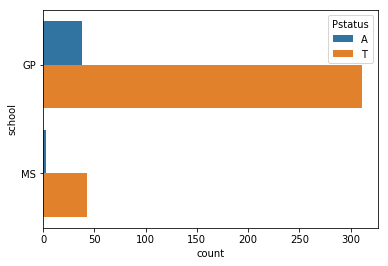

In [20]:
# Barras horizontales en cluster usando seaborn
sns.countplot(y='school', hue='Pstatus', data=df,orient='h')

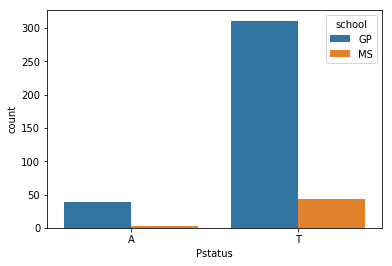

In [21]:
# Barras verticales  en cluster usando seaborn
sns.countplot(x='Pstatus', hue='school', data=df,orient='v')

In [22]:
# Obteniendo una tabla resumida para hacer las graficas de barras en matplotlib
p_table = pd.pivot_table(df,index='Pstatus',columns='school',aggfunc='size')
p_table

school,GP,MS
Pstatus,,
A,38,3
T,311,43


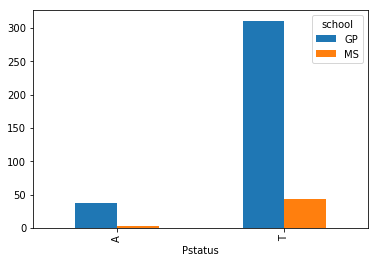

In [23]:
#Barras en cluster usando matplotlib
p_table.plot.bar(stacked=False)

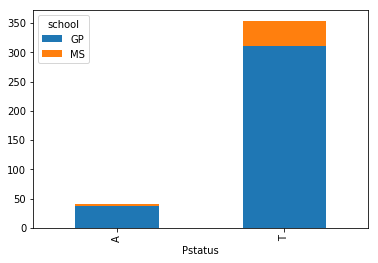

In [24]:
#Barras en stack usando matplotlib
p_table.plot.bar(stacked=True)

### Caso II. Una variable categoria y la otra cuantitativa

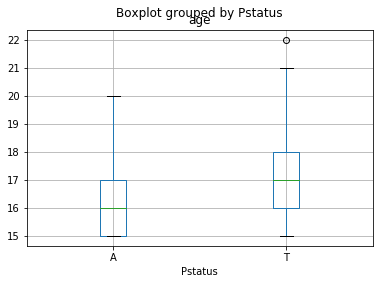

In [25]:
df.boxplot(column='age',by='Pstatus')

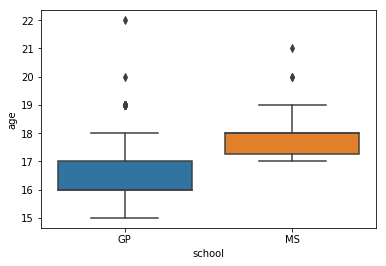

In [26]:
# Barras horizontales en cluster usando seaborn
sns.boxplot(x='school', y='age', data=df,orient='v')

### Caso III. Ambas variables son cuantitativas

In [27]:
#Leyendo los datost")
df=pd.read_table("http://academic.uprm.edu/eacuna/eje1reg.txt",sep="\s+")
df.head()

,Est,CEEB,GPA
0,1,425,2.81
1,2,495,2.56
2,3,600,2.92
3,4,610,3.18
4,5,612,2.51


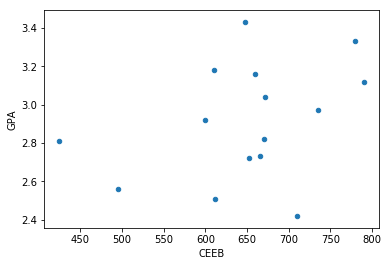

In [28]:
#scatterplot usando matplotlib
df.plot.scatter('CEEB','GPA')

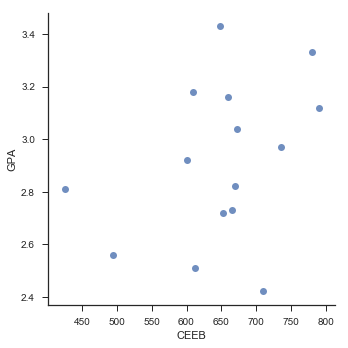

In [29]:
#scatteplot usando seaborn
sns.set(style="ticks")
sns.lmplot("CEEB", "GPA", data=df, fit_reg=False)

In [30]:
#calculo de la correlacion
df.corr()['GPA']['CEEB']

0.34803529733952582

In [1]:
# calculo  de la linea de regresion
result = sm.ols(formula="GPA ~ CEEB", data=df).fit()
print result.params

NameError: name 'sm' is not defined

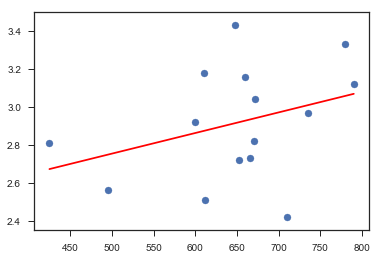

In [32]:
# Ploteando los puntos y la linea de regresion
x=df['CEEB']
y=df['GPA']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\ggplot\utils.py:66: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\edgar2017\Anaconda2\envs\ipykernel_py2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


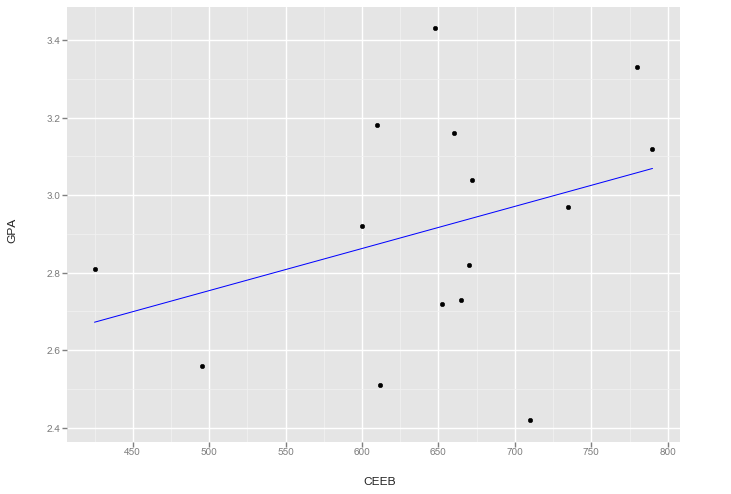

<ggplot: (14067302)>

In [33]:
#Ploteando la linea de regresion usando ggplot
from ggplot import *

ggplot(aes(x='CEEB', y='GPA'), data=df) +\
    geom_point() +\
    stat_smooth(color='blue',se=False, span=0.2)

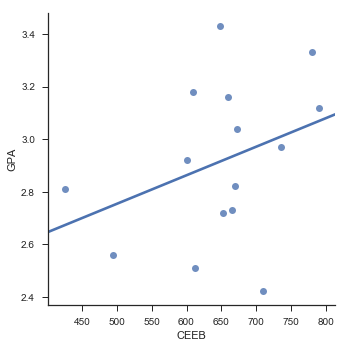

In [34]:
#PLoteando la linea de regresion usando seaborn
sns.set(style="ticks")
sns.lmplot("CEEB", "GPA", data=df,ci=False) 